# Práctica 5, Flavio Rodrigues Dias (frodrd00@estudiantes.unileon.es)

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import linear_model 
from sklearn import tree 
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron 
from sklearn import neural_network 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold # cross validation
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit # cross validation 

# Ejercicio 2

2.- Cargar el dataset de Iris (de la librería scikit-learn) y hacer el mismo estudio que hemos realizado en esta práctica para los mismos modelos de machine learning más random forest, gradient boosting y adaboost. 

## Plot de curvas de aprendizaje

In [2]:
# Fnción obtenida del tutorial de scikit-learn
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,n_jobs=10, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ejemplos de entrenamiento")
    plt.ylabel("Porcentaje de acierto")
    # el cv es cross validation
    # se calcula con la libreria de ShuffleSplit
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Porcentaje de acierto en entrenamiento-testeo")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Porcentaje en el Cross-validation")

    plt.legend(loc="best")
    return(plt)

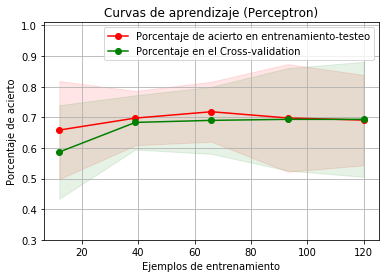

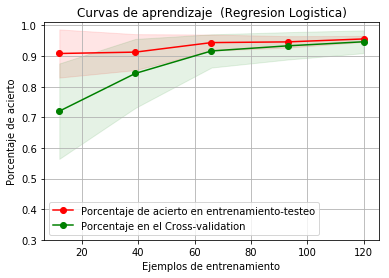

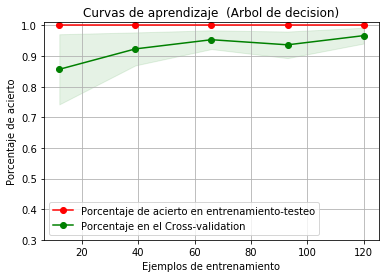

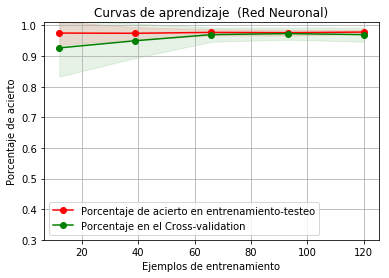

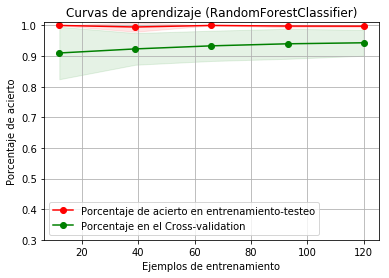

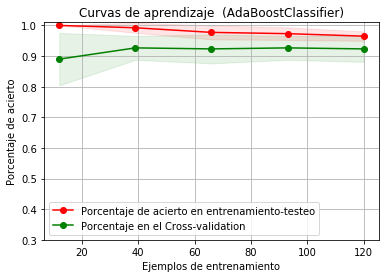

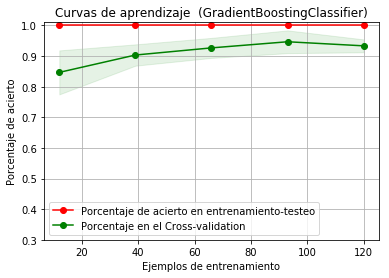

In [3]:
iris = load_iris()
X, y = iris.data, iris.target


# Curvas Cross-Validation con 10 iteraciones 
# Curvas Entrenamiento-testeo, cada caso con 20% de datos selecionados aleatoriamente como conjunto de testeo.

cv = ShuffleSplit(n_splits=10, test_size=0.2)

title = "Curvas de aprendizaje (Perceptron)"
percep=linear_model.Perceptron()
plot_learning_curve(percep, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Regresion Logistica)"
lr = linear_model.LogisticRegression()
plot_learning_curve(lr, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Arbol de decision)"
dt = tree.DecisionTreeClassifier()
plot_learning_curve(dt, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje  (Red Neuronal)"
mlp = neural_network.MLPClassifier()
plot_learning_curve(mlp, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje (RandomForestClassifier)"
rf = RandomForestClassifier()
plot_learning_curve(rf, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (AdaBoostClassifier)"
ab = AdaBoostClassifier()
plot_learning_curve(ab, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (GradientBoostingClassifier)"
gb = GradientBoostingClassifier()
plot_learning_curve(gb, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

plt.show()

### Mejor modelo Curvas de aprendizaje
Como se puede ver en las curvas de aprendizaje el mejor modelo es la **Red Neuronal**, ya que las curvas se juntan muy rápido.


## Métricas: Curvas ROC

In [4]:
def false_positives(model,data_set,target,clase_a_estudiar):
    predictions=model.predict(data_set)
    real=target
    pos=[] 
    # cuando la prediccion sea distinto de real y la prediccion sea la clase a estidiar
    for i in range(len(real)):
        if (real[i]!=predictions[i] & predictions[i]==clase_a_estudiar):
            pos.append(1)
    negative=sum(pos)
    #negative_rate=negative/len(data_set)
    return(negative)    



def true_positives(model,data_set,target,clase_a_estudiar):
    predictions=model.predict(data_set)
    real=target
    pos=[]
    for i in range(len(real)):
        if (real[i]==predictions[i] & predictions[i]==clase_a_estudiar):
            pos.append(1)
    positive=sum(pos)   
    #positive_rate=positive/len(data_set)
    return(positive)
    
    
# tiene como output el punto roc
# 
def roc(model,modelo,data_set,target,clase_a_estudiar):
    tpp=true_positives(model,data_set,target,clase_a_estudiar)
    fpp=false_positives(model,data_set,target,clase_a_estudiar)
    tp=0
    fp=0
    print('Curva ROC para %s' % modelo)
    print("True positives: %d" % tpp)
    print("False Positives: %d" %fpp)
    tot=tpp+fpp
    if tot==0:
        print("Para el modelo %s la suma de true_positives y false_positives es 0" % modelo)
    else:
        tp=tpp/tot
        fp=fpp/tot
        plt.figure()
        plt.title('Curva ROC para %s' % modelo)
        plt.xlabel("Ratio de Falsos Positivos")
        plt.ylabel("Ratio de Verdaderos Positivos")
        plt.plot([0,fp,1],[0,tp,1],'r--')
        plt.show()
    print("\n")
    return(tp,fp)

In [5]:
# se separan los datos en train y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Curva ROC para Perceptrón
True positives: 9
False Positives: 9


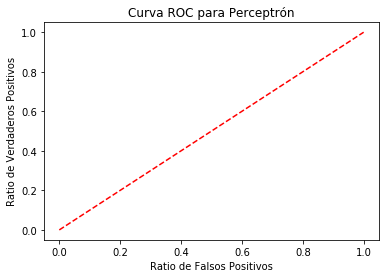



Curva ROC para Regresón Logística
True positives: 9
False Positives: 1


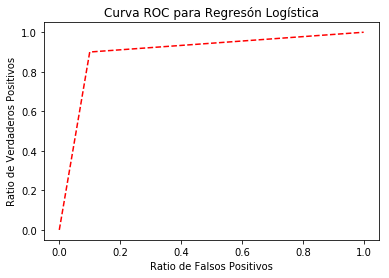



Curva ROC para Árbol de Decisión
True positives: 8
False Positives: 2


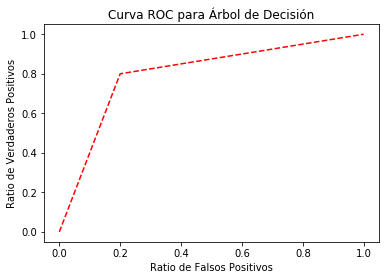



Curva ROC para Red Neuronal
True positives: 9
False Positives: 1


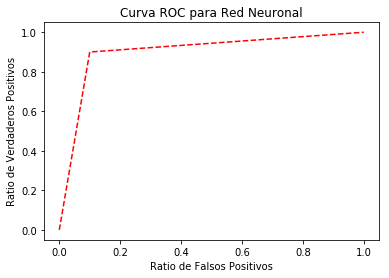



Curva ROC para RandomForestClassifier
True positives: 8
False Positives: 2


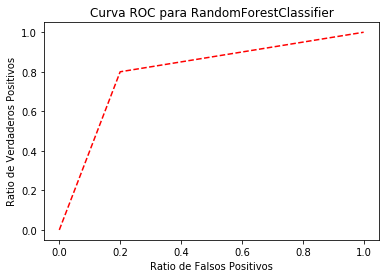



Curva ROC para AdaBoostClassifier
True positives: 8
False Positives: 2


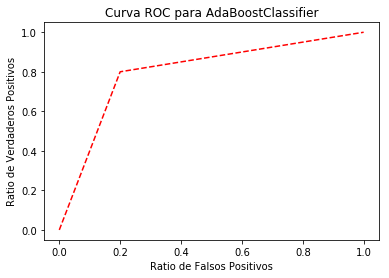



Curva ROC para GradientBoostingClassifier
True positives: 9
False Positives: 2


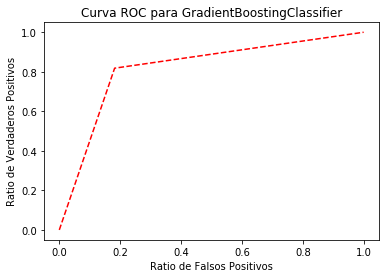

(0.8181818181818182, 0.18181818181818182)

In [6]:
# se entrenan los modelos
percep.fit(X_train,y_train)
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
mlp.fit(X_train,y_train)
rf.fit(X_train,y_train)
ab.fit(X_train,y_train)
gb.fit(X_train,y_train)

###############
roc(percep,'Perceptrón', X_test, y_test, 2)
roc(lr, 'Regresón Logística', X_test, y_test, 2)
roc(dt,'Árbol de Decisión', X_test, y_test, 2)
roc(mlp, 'Red Neuronal', X_test, y_test, 2)
roc(rf,'RandomForestClassifier', X_test, y_test, 2)
roc(ab, 'AdaBoostClassifier',X_test, y_test, 2)
roc(gb,'GradientBoostingClassifier', X_test, y_test, 2)

### Mejor modelo Curva ROC
Como se puede ver en las curvas ROC los mejores modelos son **Regresión Logística**, y **Red Neuronal**

## Métricas: Matriz de confusión

In [7]:
# se predice con los datos de test
percep_pred=percep.predict(X_test)
lr_pred=lr.predict(X_test)
dt_pred=dt.predict(X_test)
mlp_pred=mlp.predict(X_test)
rf_pred=rf.predict(X_test)
ab_pred=ab.predict(X_test)
gb_pred=gb.predict(X_test)

In [8]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    #plt.tight_layout()
    plt.show()

Confusion matrix, without normalization


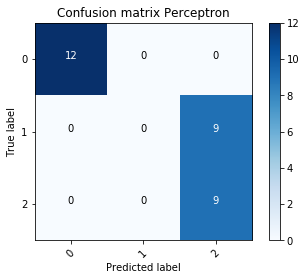

In [9]:
# Matriz de confusión del Perceptrón
class_names=['0','1','2']
y_pred = percep_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Perceptron')

Confusion matrix, without normalization


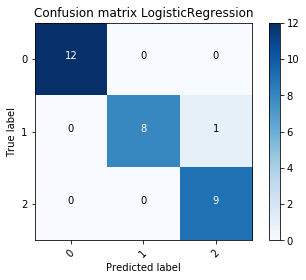

In [10]:
# Matriz de confusión del LogisticRegression
y_pred = lr_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix LogisticRegression')

Confusion matrix, without normalization


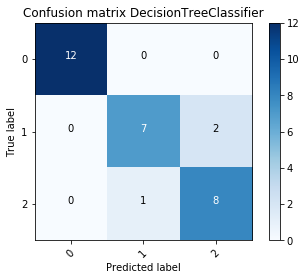

In [11]:
# Matriz de confusión del DecisionTreeClassifier
y_pred = dt_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix DecisionTreeClassifier')

Confusion matrix, without normalization


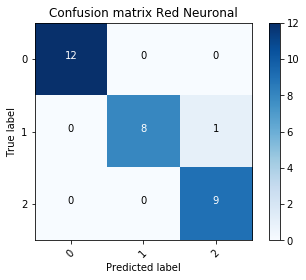

In [12]:
# Matriz de confusión del MLP
y_pred = mlp_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Red Neuronal')

Confusion matrix, without normalization


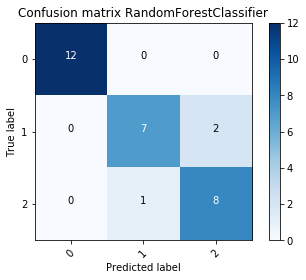

In [13]:
# Matriz de confusión del RandomForestClassifier
y_pred = rf_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix RandomForestClassifier')

Confusion matrix, without normalization


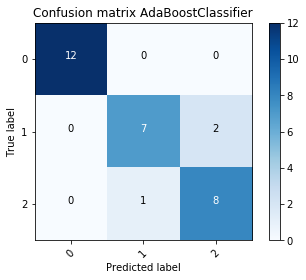

In [14]:
# Matriz de confusión del AdaBoostClassifier
y_pred = ab_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix AdaBoostClassifier')

Confusion matrix, without normalization


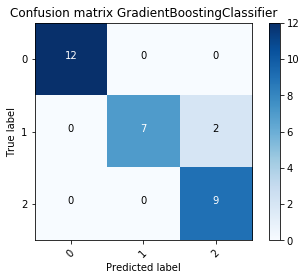

In [15]:
# Matriz de confusión del GradientBoostingClassifier
y_pred = gb_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix GradientBoostingClassifier')

### Mejor modelo Matriz de confusión
Como se puede ver en la matriz de confusión el mejor modelo es la **Regresión logistica** dado que tiene solo un fallo al predecir la clase 1.

## Accuracy Score

In [16]:
print('Accuracy Perceptrón: %.2f' % accuracy_score(percep_pred, y_test))
print('Accuracy Regresón Logística: %.2f' % accuracy_score(lr_pred, y_test))
print('Accuracy Árbol de Decisión: %.2f' % accuracy_score(dt_pred, y_test))
print('Accuracy Red Neuronal: %.2f' % accuracy_score(mlp_pred, y_test))
print('Accuracy RandomForestClassifier: %.2f' % accuracy_score(rf_pred, y_test))
print('Accuracy AdaBoostClassifier: %.2f' % accuracy_score(ab_pred, y_test))
print('Accuracy GradientBoostingClassifier: %.2f' % accuracy_score(gb_pred, y_test))

Accuracy Perceptrón: 0.70
Accuracy Regresón Logística: 0.97
Accuracy Árbol de Decisión: 0.90
Accuracy Red Neuronal: 0.97
Accuracy RandomForestClassifier: 0.90
Accuracy AdaBoostClassifier: 0.90
Accuracy GradientBoostingClassifier: 0.93


### Mejor modelo Accuracy score
Como se puede ver en la accuracy es la **Regresión logistica** y la **Red neuronal**

## Conclusión mejor modelo
Mirando los resultados anteriores el mejor modelo para mi es la **Red neuronal.**, ya que tiene un accuracy alto, y no presenta overfitting.

# Ejercicio 3

3.- Repetir el estudio del apartado 2.- dos veces más con las siguientes modificaciones: 

      3.1.- Considerando como features (variables del dataset) 'sepal length (cm)' y 'sepal width (cm)'.
      
      3.2.- Considerando como features (variables del dataset) 'petal length (cm)' y 'petal width (cm)'.

### 3.1 'sepal length (cm)' y 'sepal width (cm)'

In [17]:
iris = load_iris()
X, y = iris.data, iris.target

print(iris.feature_names) # primera y segunda caracteristica

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [18]:
X = X[:,:-2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [19]:
# se separan los datos en train y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Plot de curvas de aprendizaje

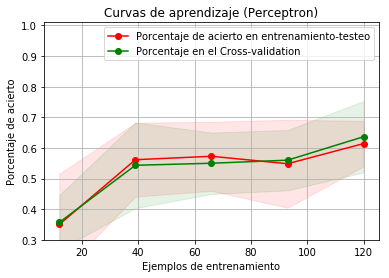

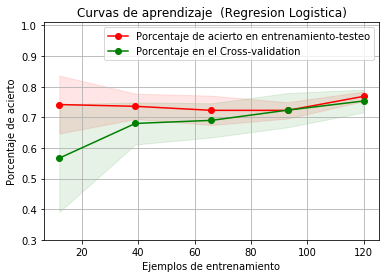

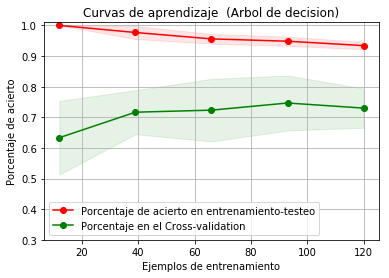

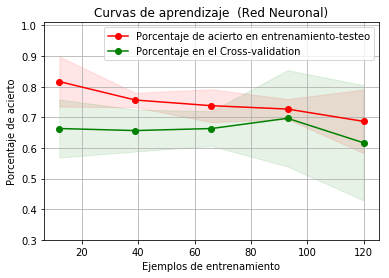

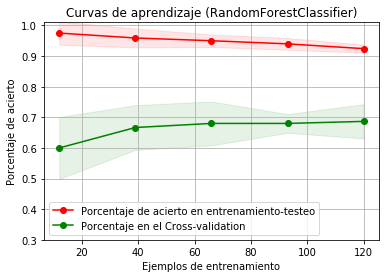

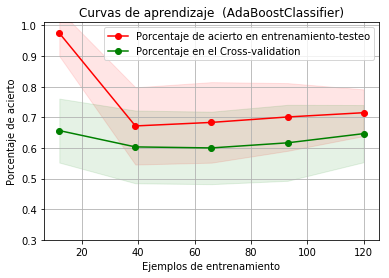

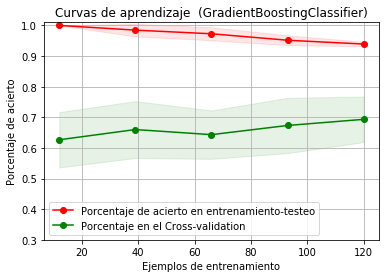

In [20]:
title = "Curvas de aprendizaje (Perceptron)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
percep=linear_model.Perceptron()
plot_learning_curve(percep, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Regresion Logistica)"
lr = linear_model.LogisticRegression()
plot_learning_curve(lr, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Arbol de decision)"
dt = tree.DecisionTreeClassifier()
plot_learning_curve(dt, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje  (Red Neuronal)"
mlp = neural_network.MLPClassifier()
plot_learning_curve(mlp, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje (RandomForestClassifier)"
rf = RandomForestClassifier()
plot_learning_curve(rf, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (AdaBoostClassifier)"
ab = AdaBoostClassifier()
plot_learning_curve(ab, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (GradientBoostingClassifier)"
gb = GradientBoostingClassifier()
plot_learning_curve(gb, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

plt.show()

### Mejor modelo
Como se puede ver en las curvas de aprendizaje el mejor modelo es la **Red Neuronal**, ya que las curvas se juntan muy rápido.


## Métricas: Curvas ROC

C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Curva ROC para Perceptrón
True positives: 5
False Positives: 10


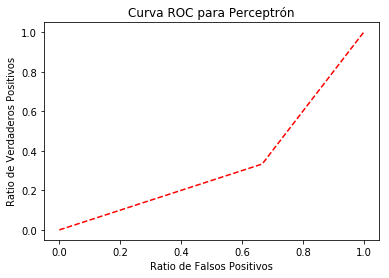



Curva ROC para Regresón Logística
True positives: 4
False Positives: 9


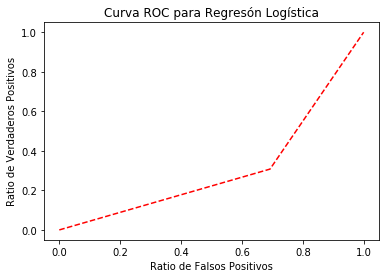



Curva ROC para Árbol de Decisión
True positives: 4
False Positives: 3


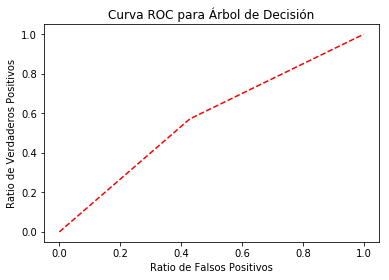



Curva ROC para Red Neuronal
True positives: 4
False Positives: 9


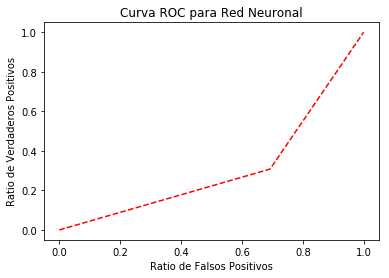



Curva ROC para RandomForestClassifier
True positives: 4
False Positives: 4


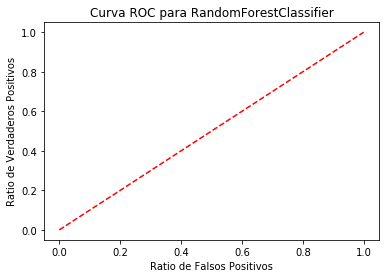



Curva ROC para AdaBoostClassifier
True positives: 4
False Positives: 11


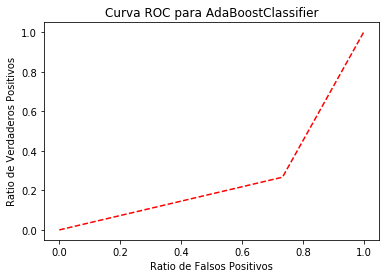



Curva ROC para GradientBoostingClassifier
True positives: 4
False Positives: 4


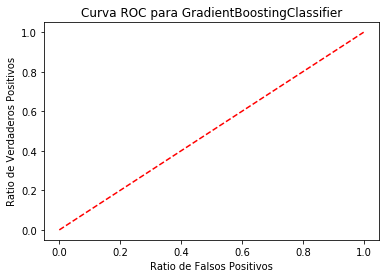

(0.5, 0.5)

In [21]:
# se entrenan los modelos
percep.fit(X_train,y_train)
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
mlp.fit(X_train,y_train)
rf.fit(X_train,y_train)
ab.fit(X_train,y_train)
gb.fit(X_train,y_train)

###############
roc(percep,'Perceptrón', X_test, y_test, 2)
roc(lr, 'Regresón Logística', X_test, y_test, 2)
roc(dt,'Árbol de Decisión', X_test, y_test, 2)
roc(mlp, 'Red Neuronal', X_test, y_test, 2)
roc(rf,'RandomForestClassifier', X_test, y_test, 2)
roc(ab, 'AdaBoostClassifier',X_test, y_test, 2)
roc(gb,'GradientBoostingClassifier', X_test, y_test, 2)

### Mejor modelo Curva ROC
Como se puede ver en las curvas ROC los mejores modelos son **Random Forest** y **Gradeunt Boost*, los dos tienen 4/4

## Métricas: Matriz de confusión

In [22]:
# se predice con los datos de test
percep_pred=percep.predict(X_test)
lr_pred=lr.predict(X_test)
dt_pred=dt.predict(X_test)
mlp_pred=mlp.predict(X_test)
rf_pred=rf.predict(X_test)
ab_pred=ab.predict(X_test)
gb_pred=gb.predict(X_test)

Confusion matrix, without normalization


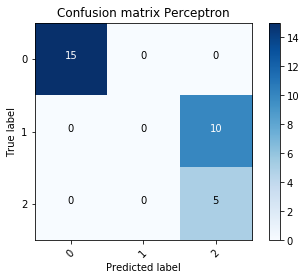

In [23]:
# Matriz de confusión del Perceptrón
class_names=['0','1','2']
y_pred = percep_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Perceptron')

Confusion matrix, without normalization


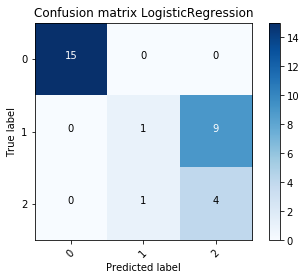

In [24]:
# Matriz de confusión del LogisticRegression
y_pred = lr_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix LogisticRegression')

Confusion matrix, without normalization


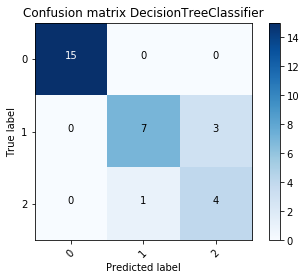

In [25]:
# Matriz de confusión del DecisionTreeClassifier
y_pred = dt_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix DecisionTreeClassifier')

Confusion matrix, without normalization


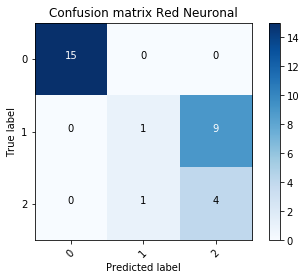

In [26]:
# Matriz de confusión del MLP
y_pred = mlp_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Red Neuronal')

Confusion matrix, without normalization


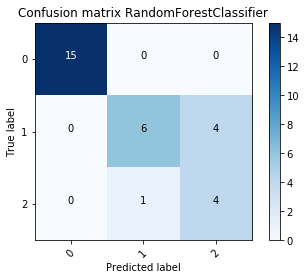

In [27]:
# Matriz de confusión del RandomForestClassifier
y_pred = rf_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix RandomForestClassifier')

Confusion matrix, without normalization


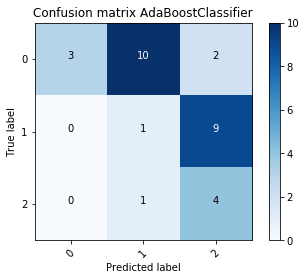

In [28]:
# Matriz de confusión del AdaBoostClassifier
y_pred = ab_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix AdaBoostClassifier')

Confusion matrix, without normalization


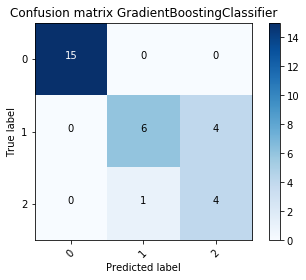

In [29]:
# Matriz de confusión del GradientBoostingClassifier
y_pred = gb_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix GradientBoostingClassifier')

### Mejor modelo Matriz de confusión
Como se puede ver en la matriz de confusión los mejores modelos son **Gradient Boost Classifier** y la **Red Neuronal**


## Accuracy Score

In [30]:
print('Accuracy Perceptrón: %.2f' % accuracy_score(percep_pred, y_test))
print('Accuracy Regresón Logística: %.2f' % accuracy_score(lr_pred, y_test))
print('Accuracy Árbol de Decisión: %.2f' % accuracy_score(dt_pred, y_test))
print('Accuracy Red Neuronal: %.2f' % accuracy_score(mlp_pred, y_test))
print('Accuracy RandomForestClassifier: %.2f' % accuracy_score(rf_pred, y_test))
print('Accuracy AdaBoostClassifier: %.2f' % accuracy_score(ab_pred, y_test))
print('Accuracy GradientBoostingClassifier: %.2f' % accuracy_score(gb_pred, y_test))

Accuracy Perceptrón: 0.67
Accuracy Regresón Logística: 0.67
Accuracy Árbol de Decisión: 0.87
Accuracy Red Neuronal: 0.67
Accuracy RandomForestClassifier: 0.83
Accuracy AdaBoostClassifier: 0.27
Accuracy GradientBoostingClassifier: 0.83


### Mejor modelo Accuracy score
Como se puede ver en la accuracy es **Arbol de decision** con 87% de aciertos

## Conclusión mejor modelo
Mirando los resultados anteriores el mejor modelo para mi es **la red neuronal** ya que el **arbol de decision**  presenta overfitting.

### 3.2 'petal length (cm)' y 'petal width (cm)'

In [31]:
iris = load_iris()
X, y = iris.data, iris.target

print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [32]:
X = X[:,-2:]
X

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

In [33]:
# se separan los datos en train y data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Plot de curvas de aprendizaje

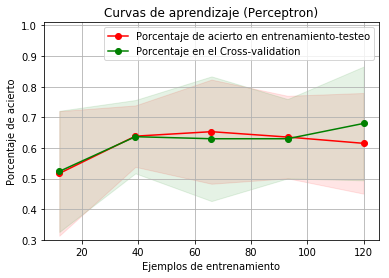

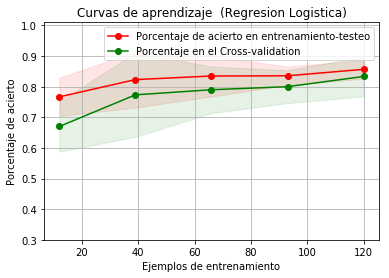

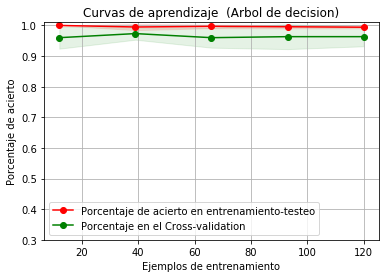

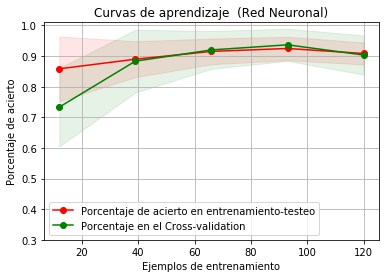

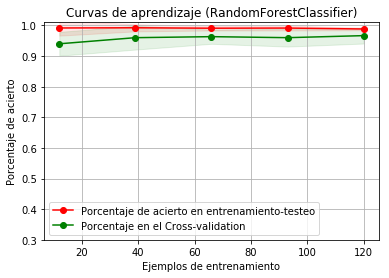

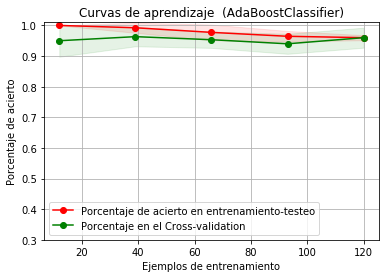

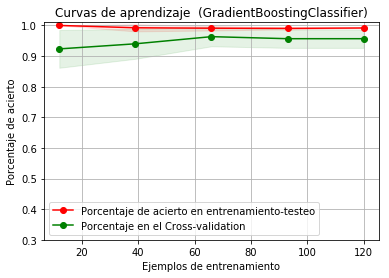

In [34]:
title = "Curvas de aprendizaje (Perceptron)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
percep=linear_model.Perceptron()
plot_learning_curve(percep, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Regresion Logistica)"
lr = linear_model.LogisticRegression()
plot_learning_curve(lr, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (Arbol de decision)"
dt = tree.DecisionTreeClassifier()
plot_learning_curve(dt, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje  (Red Neuronal)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
mlp = neural_network.MLPClassifier()
plot_learning_curve(mlp, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

title = "Curvas de aprendizaje (RandomForestClassifier)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
rf = RandomForestClassifier()
plot_learning_curve(rf, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (AdaBoostClassifier)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
ab = AdaBoostClassifier()
plot_learning_curve(ab, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)


title = "Curvas de aprendizaje  (GradientBoostingClassifier)"
cv = ShuffleSplit(n_splits=10, test_size=0.2)
gb = GradientBoostingClassifier()
plot_learning_curve(gb, title, X, y, (0.3, 1.01), cv=cv, n_jobs=10)

plt.show()

### Mejor modelo
Como se puede ver en las curvas de aprendizaje el mejor modelo es la **Red Neuronal**, ya que las curvas se juntan muy rápido.


## Métricas: Curvas ROC

C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Flavio\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) re

Curva ROC para Perceptrón
True positives: 16
False Positives: 8


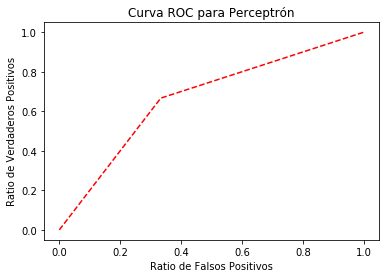



Curva ROC para Regresón Logística
True positives: 16
False Positives: 2


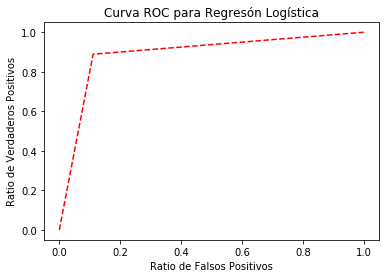



Curva ROC para Árbol de Decisión
True positives: 15
False Positives: 0


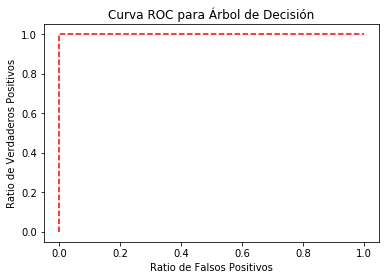



Curva ROC para Red Neuronal
True positives: 16
False Positives: 1


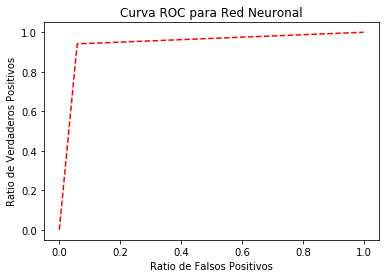



Curva ROC para RandomForestClassifier
True positives: 16
False Positives: 0


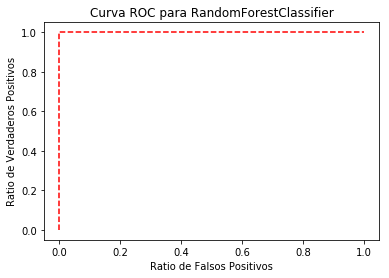



Curva ROC para AdaBoostClassifier
True positives: 13
False Positives: 0


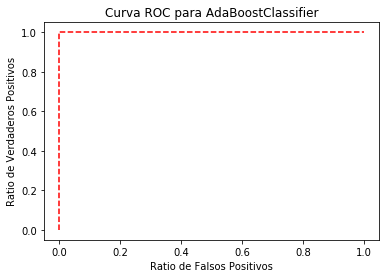



Curva ROC para GradientBoostingClassifier
True positives: 15
False Positives: 0


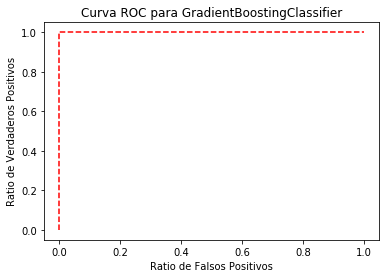

(1.0, 0.0)

In [35]:
# se entrenan los modelos
percep.fit(X_train,y_train)
lr.fit(X_train,y_train)
dt.fit(X_train,y_train)
mlp.fit(X_train,y_train)
rf.fit(X_train,y_train)
ab.fit(X_train,y_train)
gb.fit(X_train,y_train)

###############
roc(percep,'Perceptrón', X_test, y_test, 2)
roc(lr, 'Regresón Logística', X_test, y_test, 2)
roc(dt,'Árbol de Decisión', X_test, y_test, 2)
roc(mlp, 'Red Neuronal', X_test, y_test, 2)
roc(rf,'RandomForestClassifier', X_test, y_test, 2)
roc(ab, 'AdaBoostClassifier',X_test, y_test, 2)
roc(gb,'GradientBoostingClassifier', X_test, y_test, 2)

### Mejor modelo Curva ROC
Como se puede ver en las curvas ROC los mejores modelos son **Random Forest**, **AdaboostClassifier**, **Gradient Boost**

## Métricas: Matriz de confusión

In [36]:
# se predice con los datos de test
percep_pred=percep.predict(X_test)
lr_pred=lr.predict(X_test)
dt_pred=dt.predict(X_test)
mlp_pred=mlp.predict(X_test)
rf_pred=rf.predict(X_test)
ab_pred=ab.predict(X_test)
gb_pred=gb.predict(X_test)

Confusion matrix, without normalization


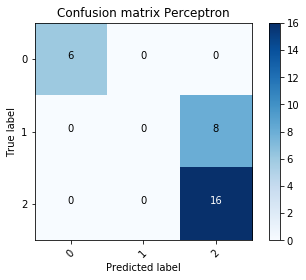

In [37]:
# Matriz de confusión del Perceptrón
class_names=['0','1','2']
y_pred = percep_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Perceptron')

Confusion matrix, without normalization


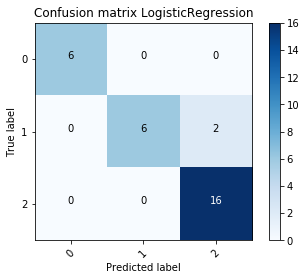

In [38]:
# Matriz de confusión del LogisticRegression
y_pred = lr_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix LogisticRegression')

Confusion matrix, without normalization


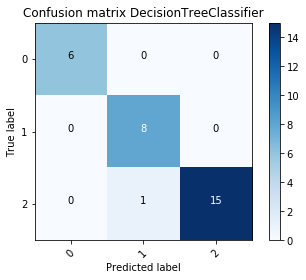

In [39]:
# Matriz de confusión del DecisionTreeClassifier
y_pred = dt_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix DecisionTreeClassifier')

Confusion matrix, without normalization


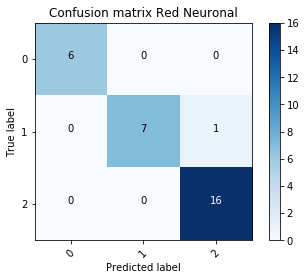

In [40]:
# Matriz de confusión del MLP
y_pred = mlp_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix Red Neuronal')

Confusion matrix, without normalization


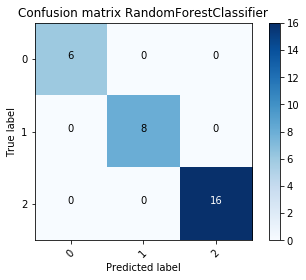

In [41]:
# Matriz de confusión del RandomForestClassifier
y_pred = rf_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix RandomForestClassifier')

Confusion matrix, without normalization


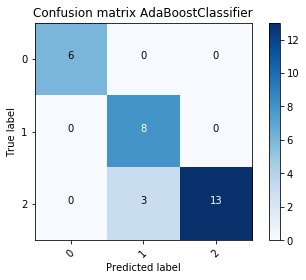

In [42]:
# Matriz de confusión del AdaBoostClassifier
y_pred = ab_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix AdaBoostClassifier')

Confusion matrix, without normalization


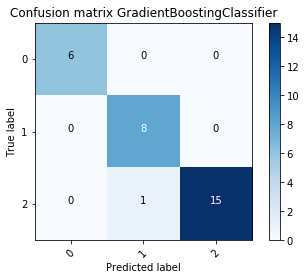

In [43]:
# Matriz de confusión del GradientBoostingClassifier
y_pred = gb_pred
cnf_matrix=confusion_matrix(y_test, y_pred)

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix GradientBoostingClassifier')

### Mejor modelo Matriz de confusión
Como se puede ver en la matriz de confusión el mejor modelo es la **Random Forest** dado que predice todo bien y la **red neuronal** falla en uno.

## Accuracy Score

In [44]:
print('Accuracy Perceptrón: %.2f' % accuracy_score(percep_pred, y_test))
print('Accuracy Regresón Logística: %.2f' % accuracy_score(lr_pred, y_test))
print('Accuracy Árbol de Decisión: %.2f' % accuracy_score(dt_pred, y_test))
print('Accuracy Red Neuronal: %.2f' % accuracy_score(mlp_pred, y_test))
print('Accuracy RandomForestClassifier: %.2f' % accuracy_score(rf_pred, y_test))
print('Accuracy AdaBoostClassifier: %.2f' % accuracy_score(ab_pred, y_test))
print('Accuracy GradientBoostingClassifier: %.2f' % accuracy_score(gb_pred, y_test))

Accuracy Perceptrón: 0.73
Accuracy Regresón Logística: 0.93
Accuracy Árbol de Decisión: 0.97
Accuracy Red Neuronal: 0.97
Accuracy RandomForestClassifier: 1.00
Accuracy AdaBoostClassifier: 0.90
Accuracy GradientBoostingClassifier: 0.97


### Mejor modelo Accuracy score
Como se puede ver en la accuracy es el **Random forest**

## Conclusión mejor modelo
Mirando los resultados anteriores el mejor modelo para mi es **la red neuronal** ya que el **arbol de decision**  presenta más overfitting.